In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import jit

In [6]:
def laguerre(n,alpha,x):
#LAGUERRE Compute the LAGUERRE polynomial of degree n.
# h = laguerre(n, alpha, x) returns the laguerre polynomial
# of degree n, alpha in x.


#Check whether n is a non-negative integer
    if np.logical_or(round(n)- n!= 0, n < 0):
        #return print('n must be a positive integer')
        raise ValueError('n must be a positive integer') 
    
# Set up a vector of the same size as final vecto
    lp = np.zeros(n+1)
    
# if either of the first 2 laguerre polynomials just state them
    if n==0:
        lp = np.ones(1)
    elif n== 1:
        lp = [alpha+1.0,-1.0]
    elif n>1:
        lp_l = np.zeros(n+1)
        lp_u = np.zeros(n+1)
        lp_l[0] = 1.0
        lp_u[0] = alpha + 1
        lp_u[1] = -1
        
        for ii in range(2, n+1): 
            lp = (2+(alpha-1)/ii)*lp_u-1/ii*np.concatenate(([0],lp_u[0:n])) -(1+(alpha-1)/ii)*lp_l;
            # Remember with indice addressing this mean from 0 to less than n
            # Now reset the polynomials
            lp_l = lp_u.copy()
            lp_u = lp.copy()
    lp = np.flipud(lp)
 # Now evaluate full vector h(n,x)
    res = np.polyval(lp,x)
    return res

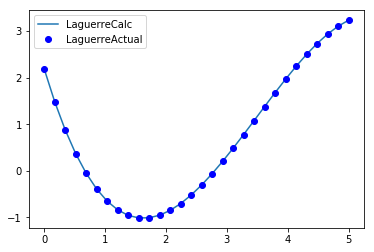

In [22]:
alpha = 0.5
n = 3 
x_v = np.linspace(0,5,30)
test_actual = -x_v**3/6+((alpha+3)*x_v**2)/2-(alpha+2)*(alpha + 3)*x_v/2+(alpha+1)*(alpha+2)*(alpha+3)/6
test = laguerre(n,alpha,x_v)
plt.figure(1)
plt.plot(x_v,test,label = 'LaguerreCalc')
plt.plot(x_v,test_actual,'bo',label = 'LaguerreActual')
plt.legend()

In [24]:
ntest = 50
alpha = 0
n_v = np.zeros(ntest+1)
n_v[ntest]=ntest
# Built in code does not seem to have alpha as input

x_v_test = np.linspace(0,1,int(1e6))
t0 = time.time()
laguerre(ntest,alpha,x_v_test)
t1 = time.time()
np.polynomial.laguerre.lagval(x_v_test,n_v)
t2 = time.time()
print('Built in time = ',t2-t1)
print('Developed code =', t1 -t0 )

Built in time =  1.043208360671997
Developed code = 0.3480691909790039
